In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib

In [ ]:
file_path = 'CSV PATH'
df = pd.read_csv(file_path)

In [44]:
df.dropna(subset=['Room', 'Area'], inplace=True)

In [45]:
df['Area'] = df['Area'].str.replace('㎡', '').astype(float)

In [46]:
df['Subway_Station'] = df['Subway_Distance'].str.extract(r'(\d+号线-[\u4e00-\u9fa5]+)')

In [47]:
df['Subway_Distance_Value'] = df['Subway_Distance'].apply(lambda x: re.search(r'(\d+)m', str(x)))
df['Subway_Distance_Value'] = df['Subway_Distance_Value'].apply(lambda x: float(x.group(1)) if x else None)

In [49]:
df.drop('Subway_Distance', axis=1, inplace=True)

In [51]:
df.dropna(subset=['Subway_Distance_Value'], inplace=True)

In [52]:
print(df.head())

                            Title Room   Area  Rent Address Subway_Station  \
0   整租 豪华装修 浙一浙二 万安桥地铁站 大学路新村2室1厅   2室  58.40  4300      小营        5号线-万安桥   
2  新出可短租月付 三墩地铁口龙湖紫金天街精装一室带阳台家电齐全   1室  39.29  1800    西湖三墩         2号线-三墩   
3        翠苑三区(东区) 2室1厅1卫 50平 配套齐全   2室  50.36  2500      翠苑       10号线-翠柏路   
5     近江八园 钱江新城 四季青 万泰城 电梯房 近江地铁口   1室  46.61  3200      近江         1号线-近江   
6   采荷新村 近四季青邵逸夫2号线 配套齐全 南北通透 51平   2室  51.74  2700   凯旋/采荷        2号线-庆菱路   

   Subway_Distance_Value  
0                  481.0  
2                  199.0  
3                  858.0  
5                  478.0  
6                  790.0  


In [53]:
import plotly.express as px

In [55]:
fig = px.box(df, x='Address', y='Rent', title='地区与租金的关系')
fig.update_xaxes(tickangle=45)
fig.show()

In [56]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 

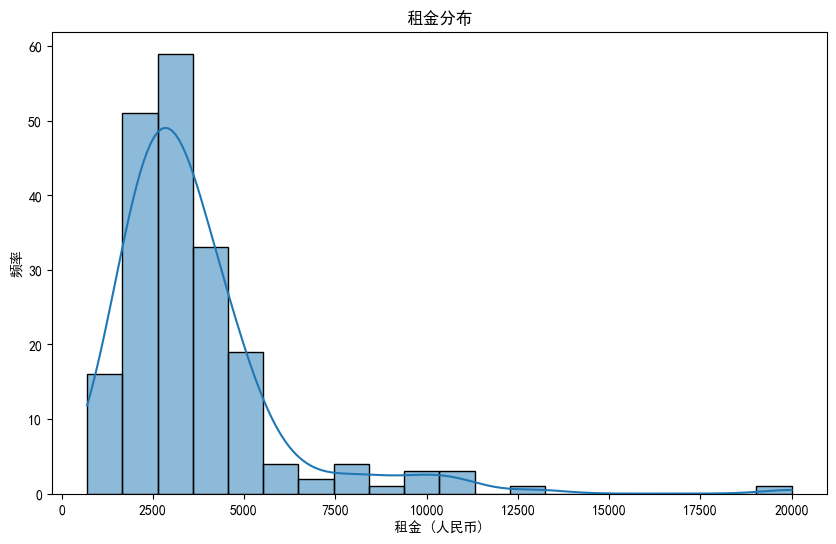

In [57]:
#杭州租金的分布频率
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], kde=True, bins=20)
plt.title('租金分布')
plt.xlabel('租金 (人民币)')
plt.ylabel('频率')
plt.show()

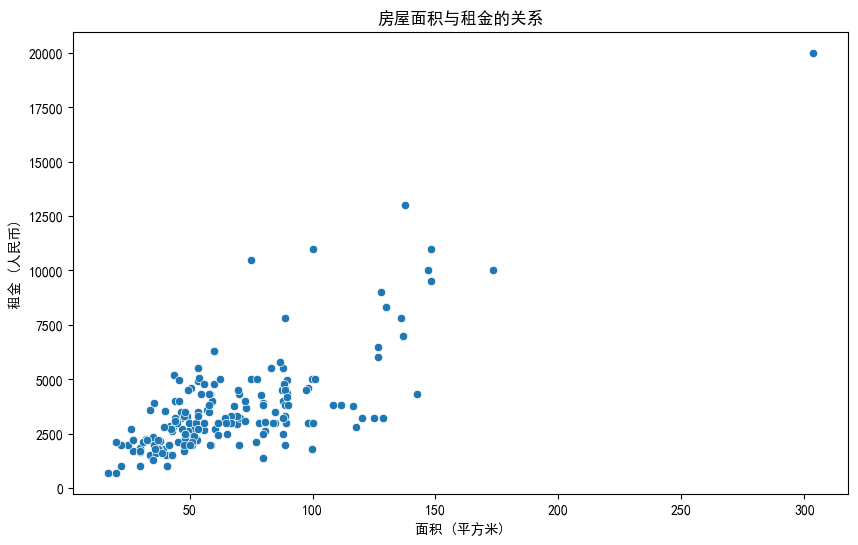

In [58]:
# 房屋面积与租金的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Rent', data=df)
plt.title('房屋面积与租金的关系')
plt.xlabel('面积 (平方米)')
plt.ylabel('租金 (人民币)')
plt.show()

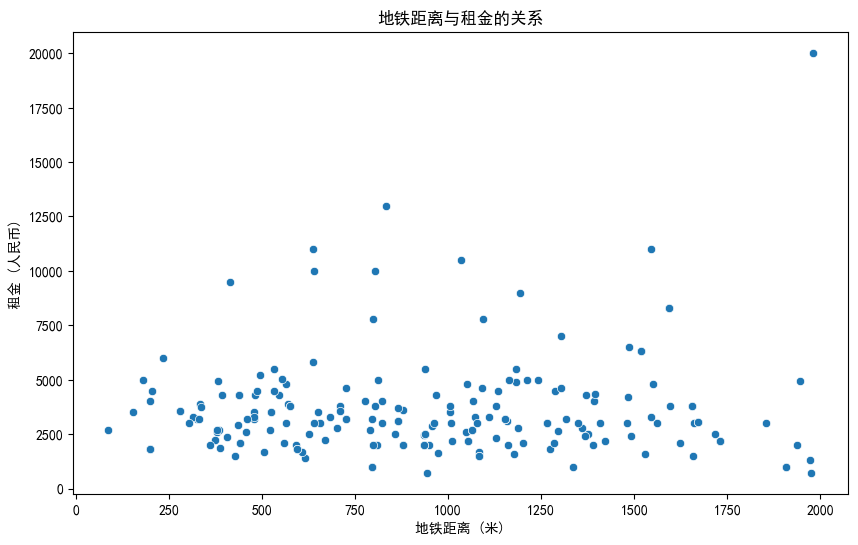

In [59]:
# 地铁距离与租金的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Subway_Distance_Value', y='Rent', data=df)
plt.title('地铁距离与租金的关系')
plt.xlabel('地铁距离 (米)')
plt.ylabel('租金 (人民币)')
plt.show()

In [70]:
features = df[['Room', 'Area', 'Subway_Distance_Value']]
features = pd.get_dummies(features, drop_first=True)
target = df['Rent']

In [71]:
feature_columns = features.columns

In [72]:
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [76]:
print(f'均方误差: {mse}')
print(f'R²: {r2}')

均方误差: 1563049.9167577364
R²: 0.5594154176825537


In [78]:
new_data = pd.DataFrame({
    'Room': ['2室'],
    'Area': [50.0], 
    'Subway_Distance_Value': [300.0]
})


new_data = pd.get_dummies(new_data, drop_first=True)


new_data = new_data.reindex(columns=feature_columns, fill_value=0)


new_data = imputer.transform(new_data)


predicted_rent = model.predict(new_data)

print(f'预测的租金: {predicted_rent[0]} 元')

预测的租金: 3011.4601254655563 元
